In [20]:
import nannyml as nml

In [21]:
reference_df, analysis_df, _ = nml.load_synthetic_car_loan_dataset()

In [22]:
reference_df.head()

,car_value,salary_range,debt_to_income_ratio,loan_length,repaid_loan_on_prev_car,size_of_downpayment,driver_tenure,repaid,timestamp,y_pred_proba,y_pred
0,39811.0,40K - 60K €,0.632950,19.0,False,40%,0.212653,1.0,2018-01-01 00:00:00.000,0.99,1
1,12679.0,40K - 60K €,0.718627,7.0,True,10%,4.927549,0.0,2018-01-01 00:08:43.152,0.07,0
2,19847.0,40K - 60K €,0.721724,17.0,False,0%,0.520817,1.0,2018-01-01 00:17:26.304,1.00,1
3,22652.0,20K - 20K €,0.705992,16.0,False,10%,0.453649,1.0,2018-01-01 00:26:09.456,0.98,1
4,21268.0,60K+ €,0.671888,21.0,True,30%,5.695263,1.0,2018-01-01 00:34:52.608,0.99,1


In [23]:
analysis_df.head()

,car_value,salary_range,debt_to_income_ratio,loan_length,repaid_loan_on_prev_car,size_of_downpayment,driver_tenure,timestamp,y_pred_proba,y_pred
0,12638.0,0 - 20K €,0.487926,21.0,False,10%,4.224628,2018-10-30 18:00:00.000,0.99,1
1,52425.0,20K - 20K €,0.672183,20.0,False,40%,4.963103,2018-10-30 18:08:43.152,0.98,1
2,20369.0,40K - 60K €,0.703090,19.0,True,40%,4.588951,2018-10-30 18:17:26.304,0.98,1
3,10592.0,20K - 20K €,0.653258,21.0,False,10%,4.711015,2018-10-30 18:26:09.456,0.97,1
4,33933.0,0 - 20K €,0.722263,18.0,False,0%,0.906738,2018-10-30 18:34:52.608,0.92,1


#### Size based chunking

In [24]:
cbpe = nml.CBPE(
    y_pred_proba='y_pred_proba',
    y_pred='y_pred',
    y_true='repaid',
    timestamp_column_name='timestamp',
    metrics=['roc_auc'],
    problem_type='classification_binary',
    chunk_size=3500, # here we define the chunk size.
)

In [25]:
cbpe.fit(reference_df)

In [26]:
est_perf = cbpe.estimate(analysis_df)

In [27]:
est_perf.data.iloc[:3, :6]

chunk                                                        \
            key chunk_index start_index end_index          start_date   
0      [0:3499]           0           0      3499 2018-01-01 00:00:00   
1   [3500:6999]           1        3500      6999 2018-01-22 04:37:12   
2  [7000:10499]           2        7000     10499 2018-02-12 09:14:24   

                           
                 end_date  
0 2018-01-22 04:28:28.848  
1 2018-02-12 09:05:40.848  
2 2018-03-05 13:42:52.848

In [28]:
figure = est_perf.plot(kind='performance')

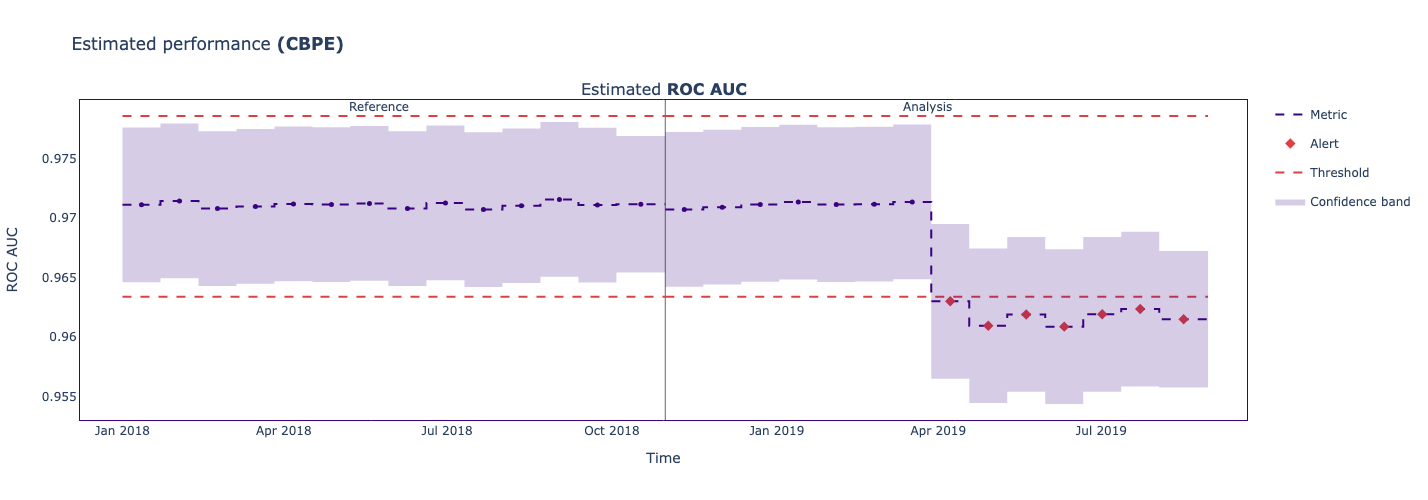

In [29]:
figure.show()

#### Regression dataset

In [30]:
reference_df, analysis_df, analysis_targets_df = nml.datasets.load_synthetic_car_price_dataset()

In [31]:
display(reference_df.head())

,car_age,km_driven,price_new,accident_count,door_count,fuel,transmission,y_true,y_pred,timestamp
0,15.0,144020.0,42810.0,4.0,3.0,diesel,automatic,569.0,1246.0,2017-01-24 08:00:00.000
1,12.0,57078.0,31835.0,3.0,3.0,electric,automatic,4277.0,4924.0,2017-01-24 08:00:33.600
2,2.0,76288.0,31851.0,3.0,5.0,diesel,automatic,7011.0,5744.0,2017-01-24 08:01:07.200
3,7.0,97593.0,29288.0,2.0,3.0,electric,manual,5576.0,6781.0,2017-01-24 08:01:40.800
4,13.0,9985.0,41350.0,1.0,5.0,diesel,automatic,6456.0,6822.0,2017-01-24 08:02:14.400


In [32]:
display(analysis_df.head())

,car_age,km_driven,price_new,accident_count,door_count,fuel,transmission,y_pred,timestamp
0,9.0,96276.0,36603.0,4.0,4.0,gas,manual,3785.0,2017-02-16 16:00:00.000
1,12.0,25303.0,22210.0,2.0,5.0,gas,manual,4134.0,2017-02-16 16:00:33.600
2,11.0,143756.0,23364.0,1.0,4.0,gas,automatic,2748.0,2017-02-16 16:01:07.200
3,10.0,88496.0,37141.0,5.0,3.0,electric,manual,3488.0,2017-02-16 16:01:40.800
4,18.0,110028.0,43042.0,1.0,4.0,gas,manual,3915.0,2017-02-16 16:02:14.400


In [33]:
display(analysis_targets_df.head())

,y_true
0,2945.0
1,2966.0
2,1833.0
3,2973.0
4,4878.0


In [34]:
estimator = nml.DLE(
    feature_column_names=['car_age', 'km_driven', 'price_new', 'accident_count',
                          'door_count', 'fuel', 'transmission'],
    y_pred='y_pred',
    y_true='y_true',
    timestamp_column_name='timestamp',
    metrics=['rmse', 'rmsle'],
    chunk_size=6000,
)

In [35]:
estimator.fit(reference_df)

/home/jaydeep/.local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning:

Using categorical_feature in Dataset.

/home/jaydeep/.local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning:

Using categorical_feature in Dataset.



In [36]:
results = estimator.estimate(analysis_df)

In [37]:
metric_fig = results.plot()

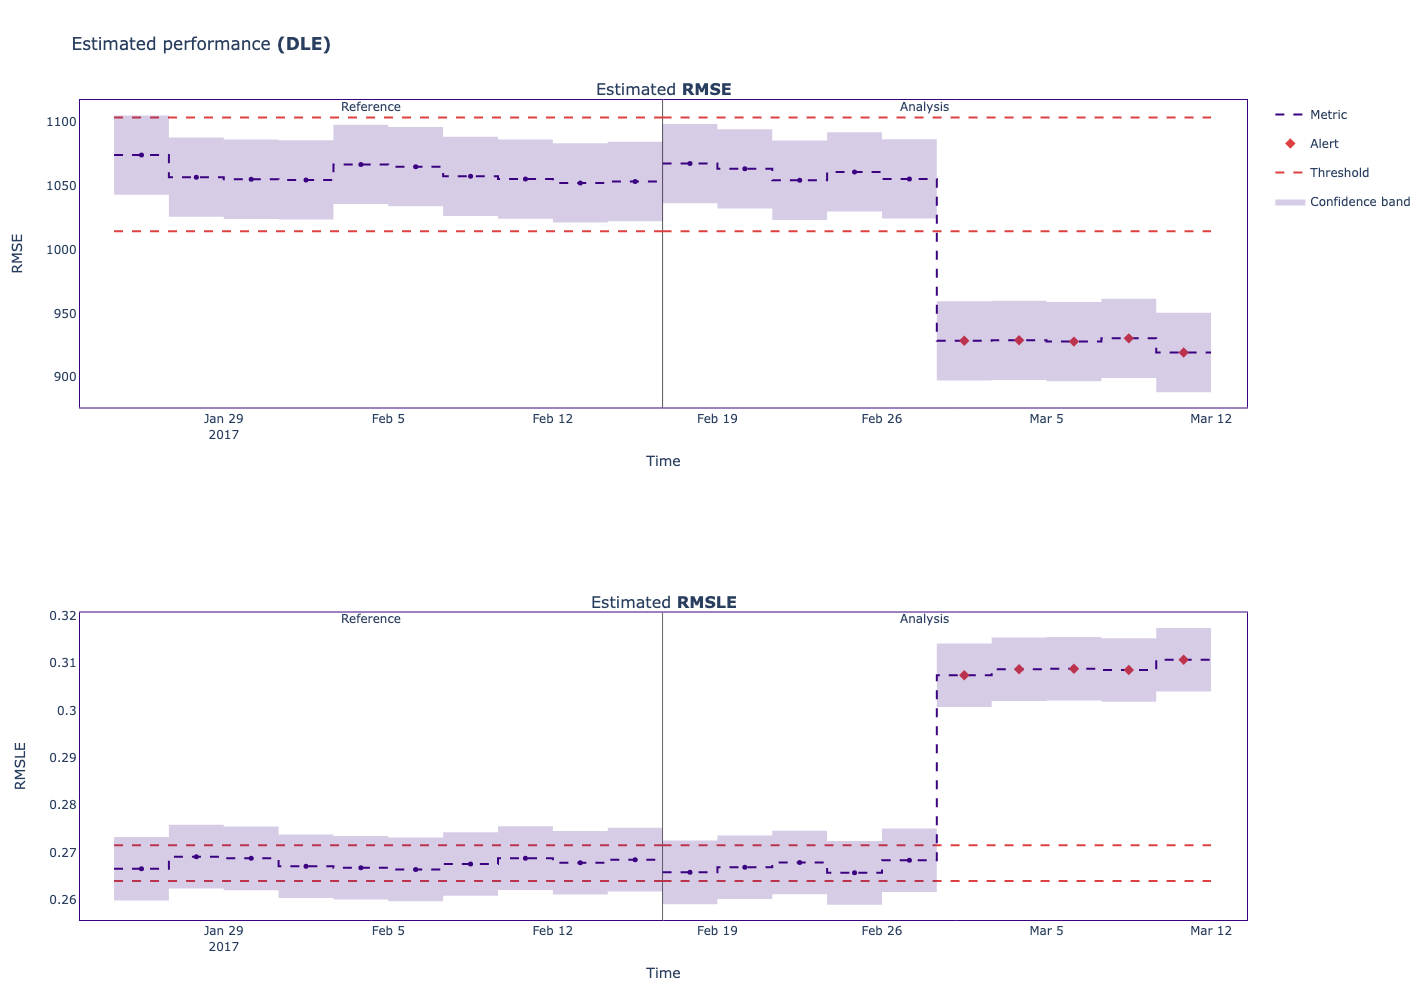

In [38]:
metric_fig.show()